# Exploratory Data Analysis

## Load the python libaries

In [2]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [4]:
# Define basic color for plots
blue = sns.color_palette()[0]
orange = sns.color_palette()[1]
green = sns.color_palette()[2]
purple = sns.color_palette()[4]

### Read the prepared data
From the previous cleaning process, I read the prepared and cleaned csv files.

In [5]:
# read in the json files
received = pd.read_csv('data/received.csv', index_col=0)
full_df = pd.read_csv('data/full.csv', low_memory=False)

# read in the json files
portfolio = pd.read_csv('data/clean_portfolio.csv')
profile = pd.read_csv('data/clean_profile.csv')


# Define index for group without unknown customers
idx = profile[profile.gender != 'U'].index



### Add tick column to received dataframe
To simplify the data analysis I will add the ticks column to the received dataframe

In [6]:
plt.rcParams.update({'font.size': 12})



In [7]:
received.shape

(76277, 33)

<AxesSubplot:xlabel='completed', ylabel='count'>

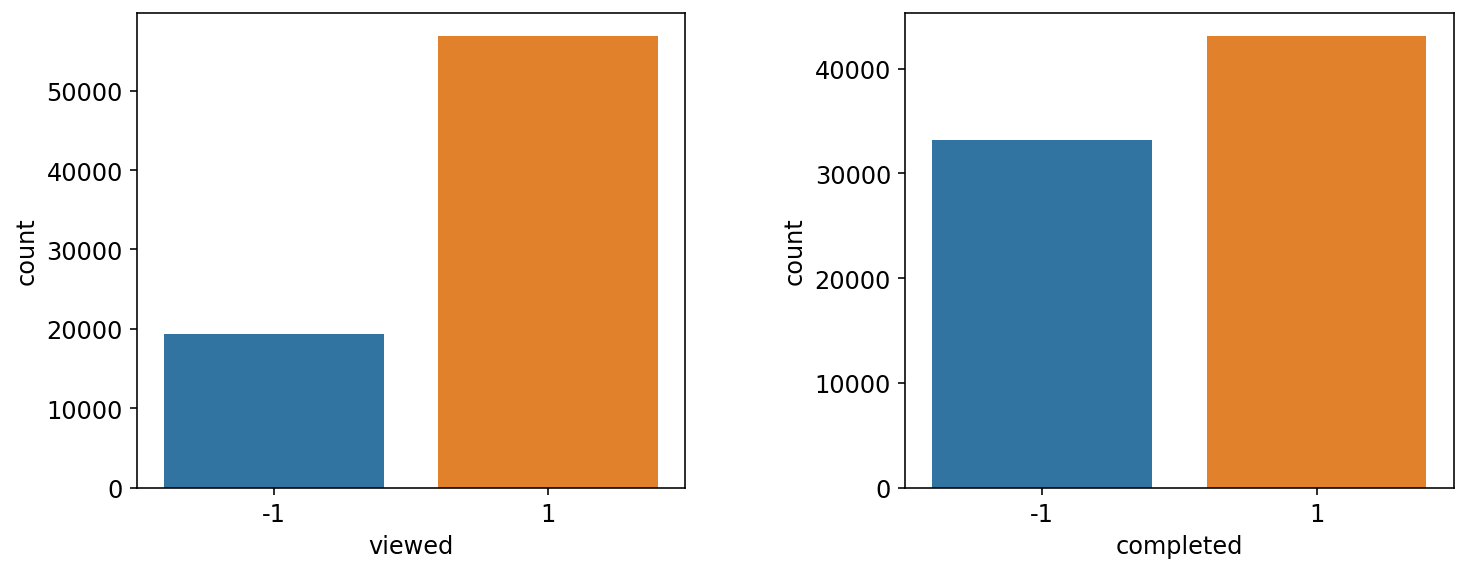

In [8]:
viewed = received.groupby('viewed').size().reset_index(name='count')
completed = received.groupby('completed').size().reset_index(name='count')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.tight_layout()
fig.subplots_adjust(wspace=.4)


sns.barplot(data=viewed, x='viewed', y='count', ax=ax1)
sns.barplot(data=completed, x='completed', y='count', ax=ax2)


<AxesSubplot:xlabel='viewed', ylabel='count'>

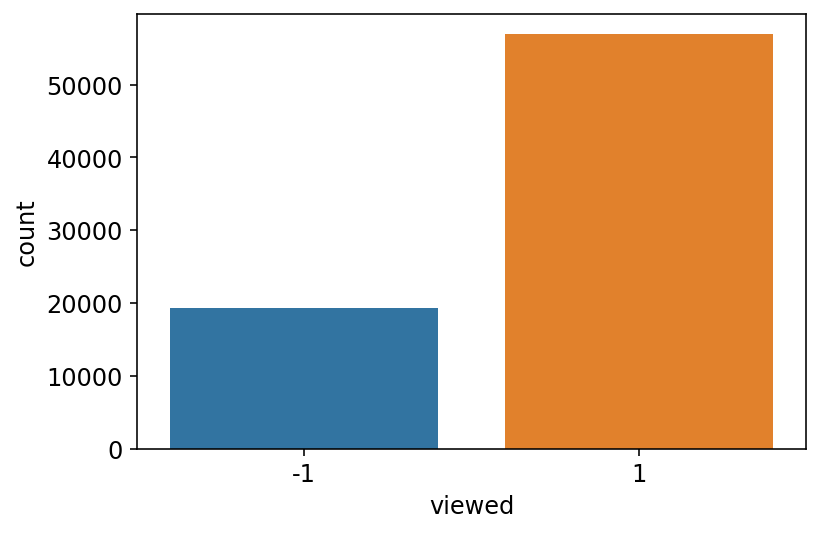

In [9]:
sns.barplot(data=viewed, x='viewed', y='count')


## Portfolio Analysis


In [10]:
portfolio

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,ticks,bogo,discount,informational
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo_10_10_7,1,0,0
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo_10_10_5,1,0,0
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,informational_0_0_4,0,0,1
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,bogo_5_5_7,1,0,0
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,discount_5_20_10,0,1,0
5,3,7,168,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_3_7_7,0,1,0
6,2,10,240,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_2_10_10,0,1,0
7,0,0,72,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,informational_0_0_3,0,0,1
8,5,5,120,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo_5_5_5,1,0,0
9,2,10,168,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,discount_2_10_7,0,1,0


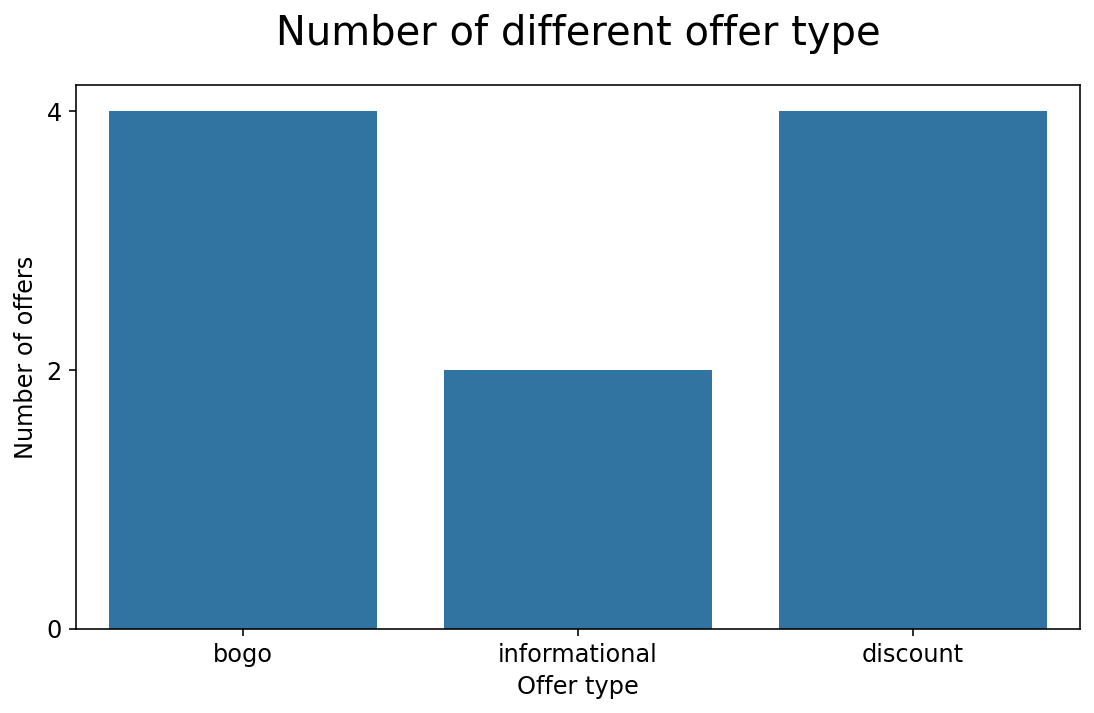

In [11]:
plt.figure(figsize=(9,5))
sns.countplot(data=portfolio, x='offer_type', color=blue)
plt.title('Number of different offer type', fontsize=20, pad=20)
plt.ylabel('Number of offers')
plt.xlabel('Offer type');

plt.yticks(range(0,5,2));

In [12]:
portfolio.query('offer_type == "discount"')

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,ticks,bogo,discount,informational
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,discount_5_20_10,0,1,0
5,3,7,168,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_3_7_7,0,1,0
6,2,10,240,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_2_10_10,0,1,0
9,2,10,168,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,discount_2_10_7,0,1,0


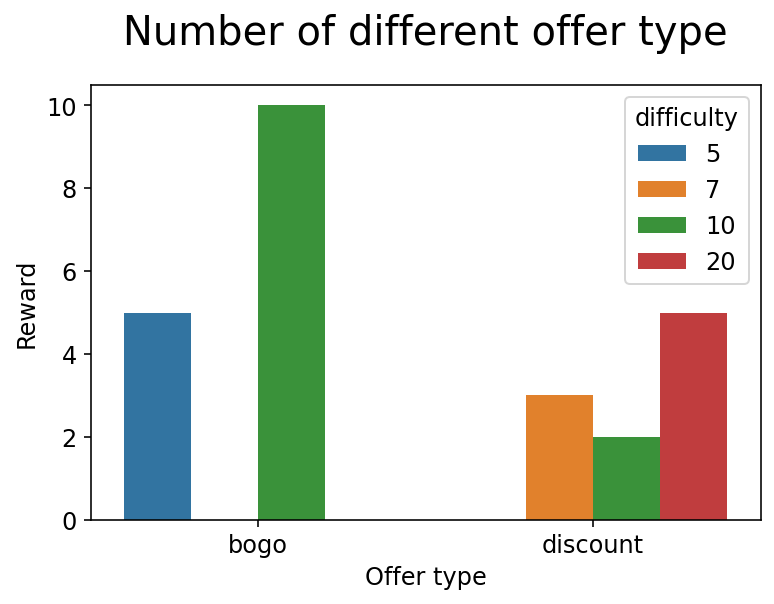

In [13]:
sns.barplot(data=portfolio.query('offer_type != "informational"'), x='offer_type', y='reward', hue='difficulty')
plt.title('Number of different offer type', fontsize=20, pad=20)
plt.ylabel('Reward')
plt.xlabel('Offer type');



In [14]:
columns = ['ticks','offer_type', 'reward', 'difficulty', 'duration', 'email',
       'mobile', 'social', 'web']
portfolio.columns.name='index'
portfolio.loc[:,columns].sort_values(by='offer_type').sort_values(by='reward', ascending=False)

index,ticks,offer_type,reward,difficulty,duration,email,mobile,social,web
0,bogo_10_10_7,bogo,10,10,168,1,1,1,0
1,bogo_10_10_5,bogo,10,10,120,1,1,1,1
3,bogo_5_5_7,bogo,5,5,168,1,1,0,1
8,bogo_5_5_5,bogo,5,5,120,1,1,1,1
4,discount_5_20_10,discount,5,20,240,1,0,0,1
5,discount_3_7_7,discount,3,7,168,1,1,1,1
6,discount_2_10_10,discount,2,10,240,1,1,1,1
9,discount_2_10_7,discount,2,10,168,1,1,0,1
2,informational_0_0_4,informational,0,0,96,1,1,0,1
7,informational_0_0_3,informational,0,0,72,1,1,1,0


## Profile Analysis
Let's start with some analysis of customer features.

### Univariate Data Analysis

First we analyse the profile data. In the profile data are 2175 persons, who do not provide informations about gender, income and age. The income of these group was set to the median income, the age to the median age and the gender to an own value 'unknown'. This group of people has been removed for some plots because they would falsify the plots with peaks.


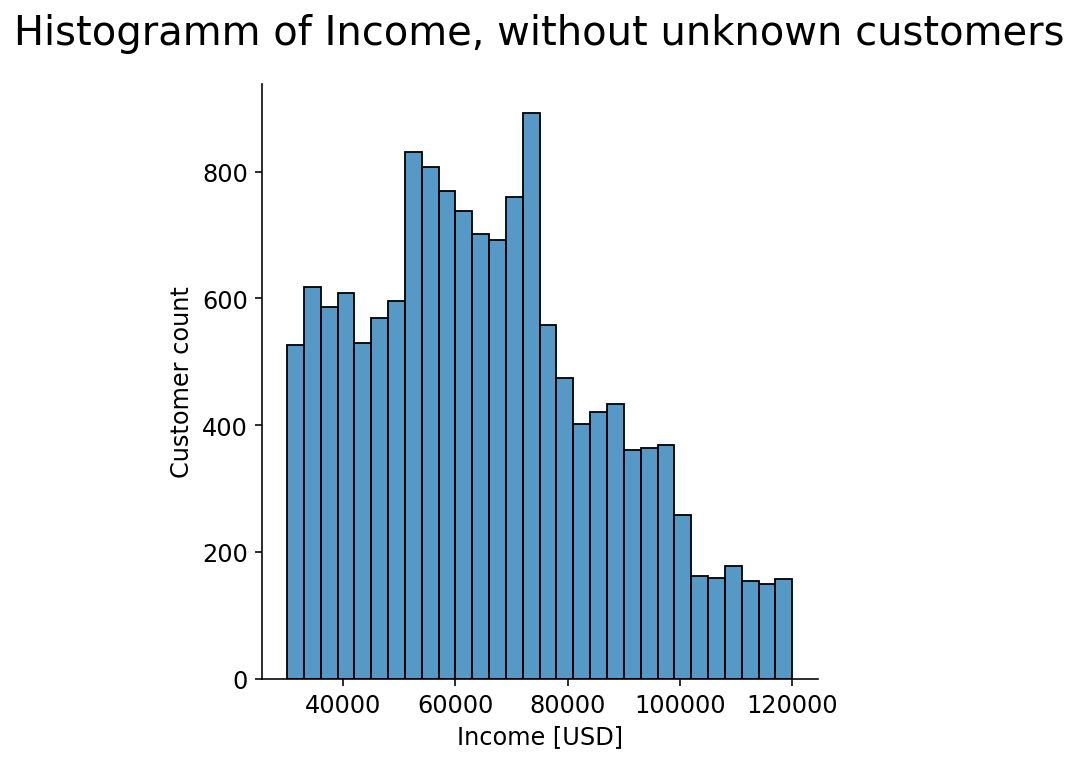

In [15]:

sns.displot(data=profile.loc[idx], x=profile.loc[idx].income, kind='hist', bins=30);
plt.title('Histogramm of Income, without unknown customers', fontsize=20, pad=20)
plt.ylabel('Customer count')
plt.xlabel('Income [USD]');

The distribution of income is reasonably right skewed.  Mean and median values are close to each other at around 64500 USD. The maximum customer income is 120000 USD the minimum income is at 30000 USD.

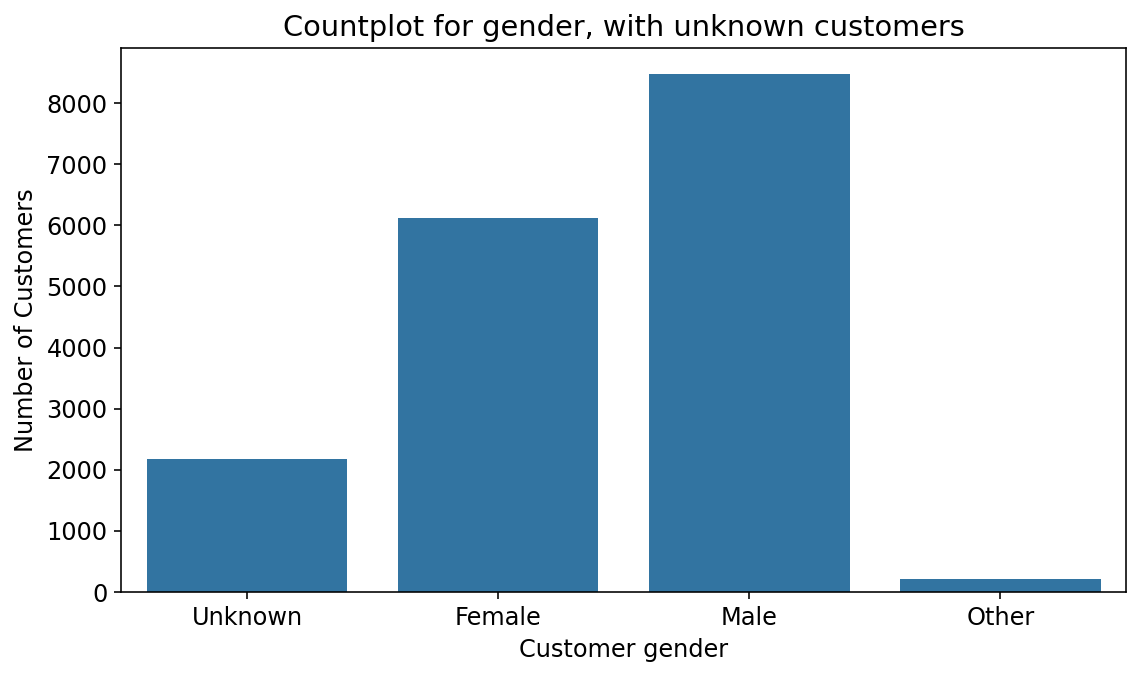

In [16]:
plt.figure(figsize=(9,5))
sns.countplot(data=profile, x='gender', color=blue)
plt.title('Countplot for gender, with unknown customers');
plt.xlabel('Customer gender')
plt.ylabel('Number of Customers');
plt.xticks(ticks=range(4), labels=['Unknown', 'Female', 'Male', 'Other']);

In [17]:
df = profile.groupby('gender').size().reset_index(name='gender_count')
df.columns.name='index'
df

index,gender,gender_count
0,F,6129
1,M,8484
2,O,212
3,U,2175


We can see that there are more male customers than female. As already known there are 2175 customers with unknown gender. The group with gender "other" is relativ small. 

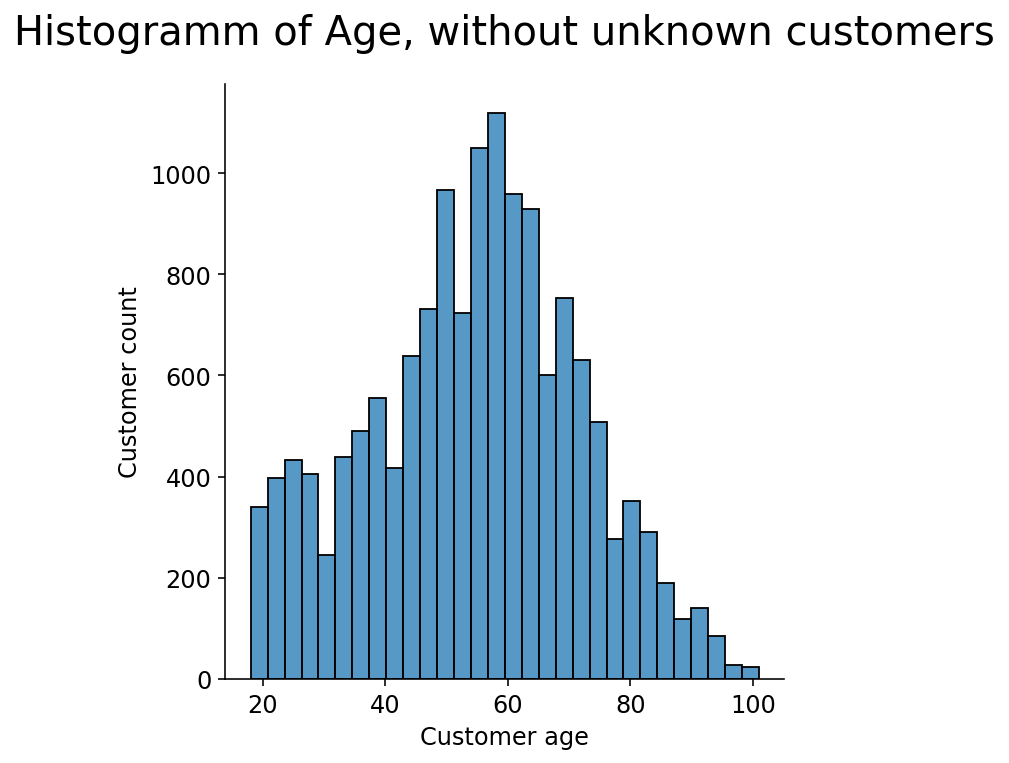

In [18]:
sns.displot(data=profile.loc[idx], x='age', kind='hist', bins=30)
plt.xlabel('Customer age')
plt.ylabel('Customer count');
plt.title('Histogramm of Age, without unknown customers', fontsize=20, pad=20);

The age is reasonably normally distributed. This is the case when we removed the customers who not provided any informations and where the age in the raw data was set to 118. 
The range of age is between 18 and 101 years old customers. The mean and median are close to each other at around 55 years.

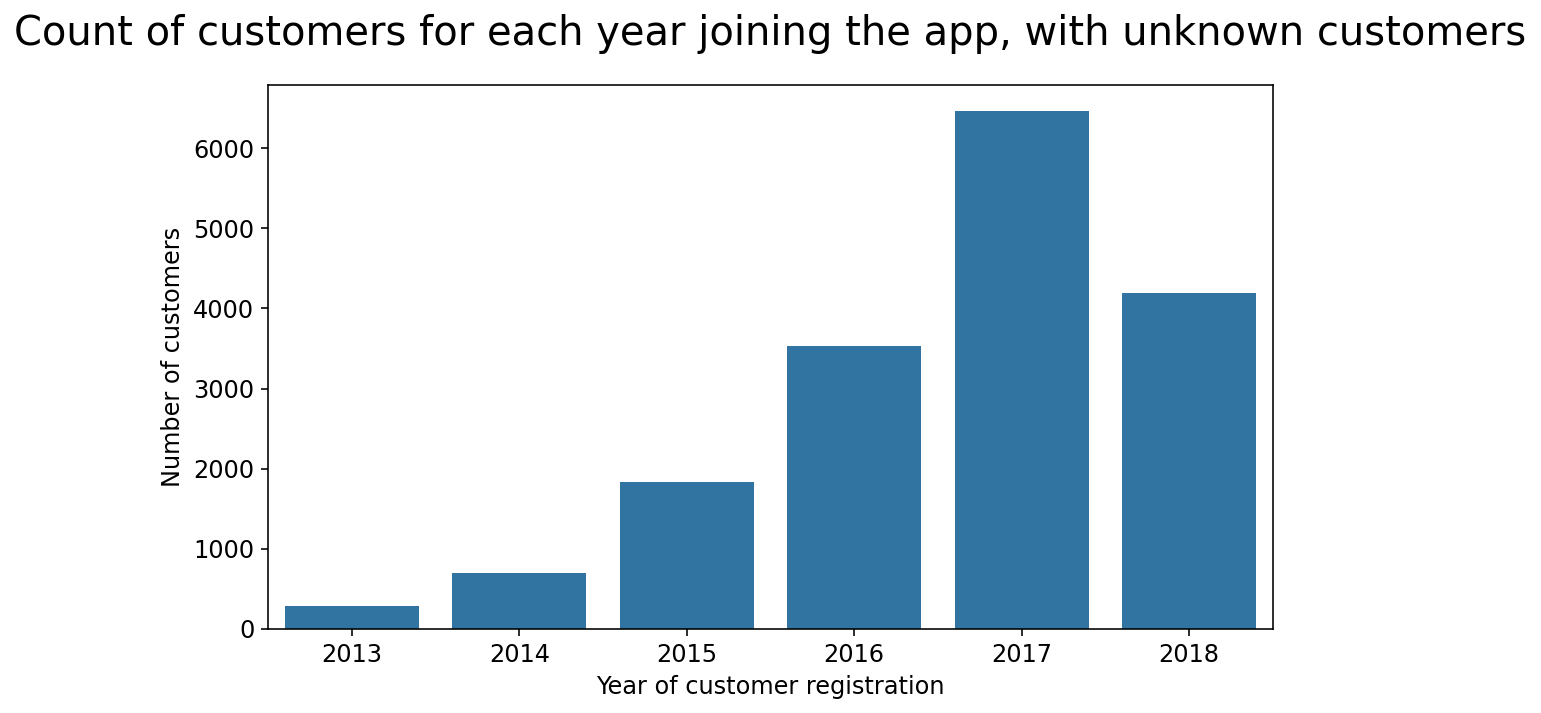

In [19]:
plt.figure(figsize=(9,5))
sns.countplot(data=profile, x='year', color=blue)
plt.title('Count of customers for each year joining the app, with unknown customers', fontsize=20, pad=20);
plt.xlabel('Year of customer registration')
plt.ylabel('Number of customers');


The number of registered customers is increasing every year until the maximum customer growth is reached in 2017. In 2018, the number of new customers will decrease again.

### Bivariate Analysis

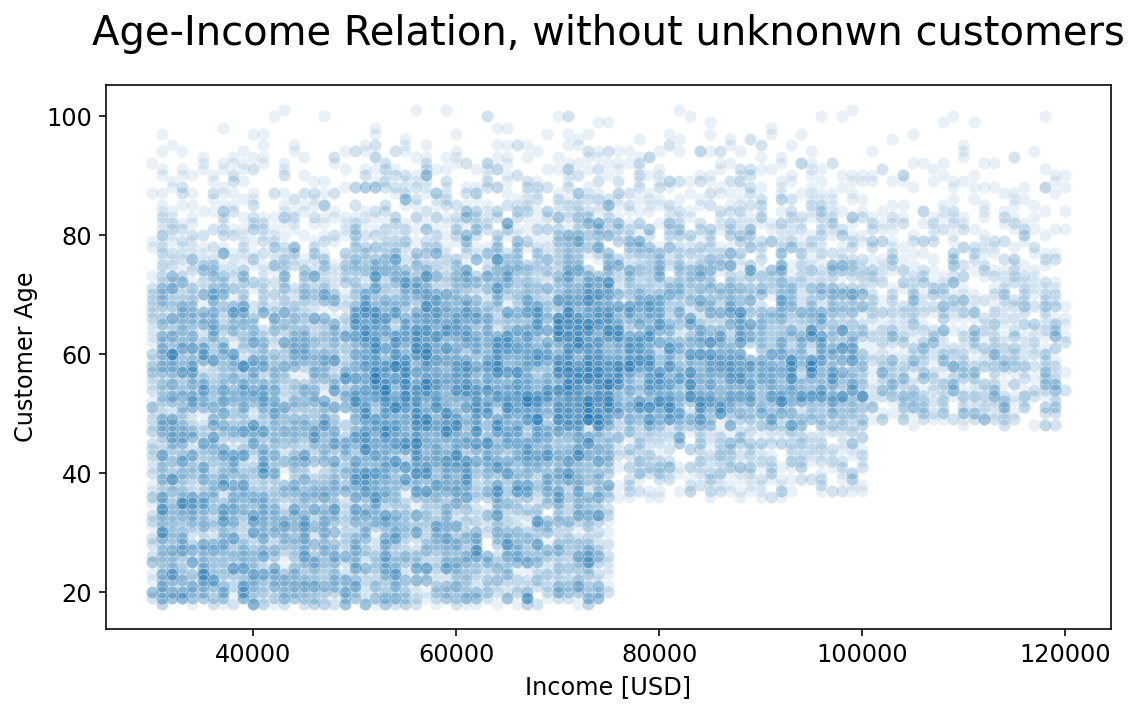

In [20]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=profile.loc[idx], x='income', y='age', alpha=0.1)
plt.xlabel('Income [USD]')
plt.ylabel('Customer Age')
#plt.legend(title='Customer gender', labels=['Female', 'Male', 'Other'])
plt.title('Age-Income Relation, without unknonwn customers', fontsize=20, pad=20);

In [21]:
profile.loc[idx].corr()

,age,income,year,month,day,member_since_days,F,M,O,U
age,1.000000,0.306703,-0.013537,0.007717,0.003755,0.012300,0.152200,-0.151504,0.000051,NaN
income,0.306703,1.000000,-0.029325,0.018851,-0.003880,0.025769,0.229396,-0.225496,-0.011808,NaN
year,-0.013537,-0.029325,1.000000,-0.290296,-0.014229,-0.969935,0.009715,-0.012119,0.010206,NaN
month,0.007717,0.018851,-0.290296,1.000000,0.004097,0.049545,0.032854,-0.032253,-0.001867,NaN
day,0.003755,-0.003880,-0.014229,0.004097,1.000000,0.014055,-0.007650,0.009315,-0.007086,NaN
member_since_days,0.012300,0.025769,-0.969935,0.049545,0.014055,1.000000,-0.018673,0.021020,-0.010141,NaN
F,0.152200,0.229396,0.009715,0.032854,-0.007650,-0.018673,1.000000,-0.971083,-0.101119,NaN
M,-0.151504,-0.225496,-0.012119,-0.032253,0.009315,0.021020,-0.971083,1.000000,-0.139322,NaN
O,0.000051,-0.011808,0.010206,-0.001867,-0.007086,-0.010141,-0.101119,-0.139322,1.000000,NaN
U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are clear income blocks. i.e. more than 100.000$ only for people, who are older than 50 years. One more fact what is slightly to see is that in the higher income areas more blue female points are to see. 

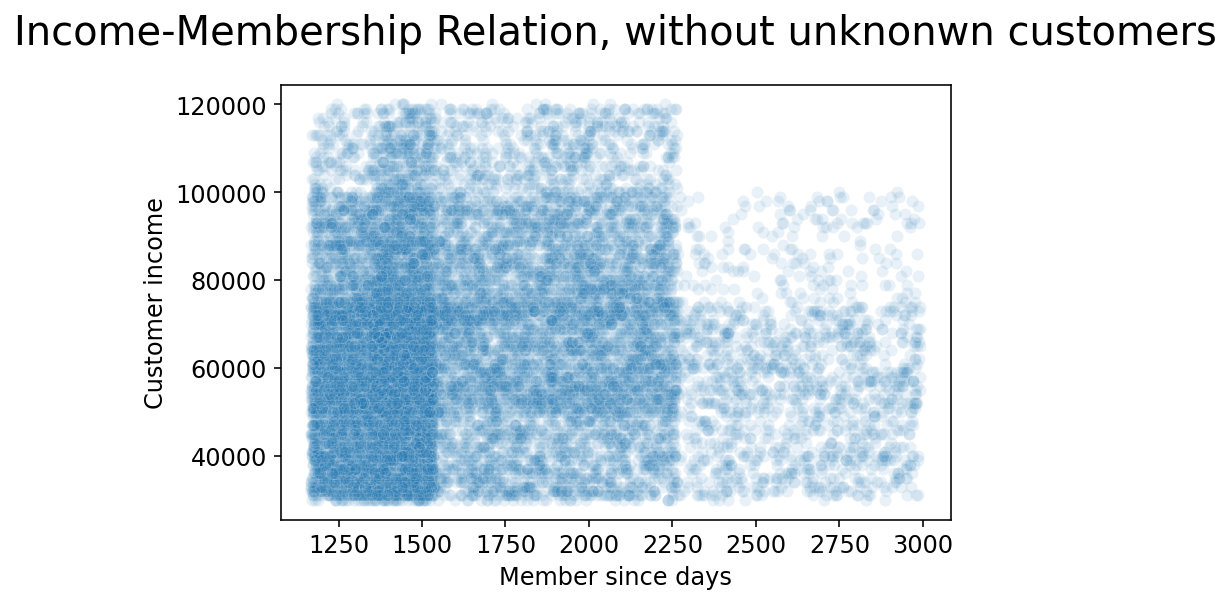

In [22]:
sns.scatterplot(data=profile.loc[idx], x='member_since_days', y='income', alpha=0.1)
plt.title('Member-Since-Days-Income Relation');
plt.xlabel('Member since days')
plt.ylabel('Customer income')
#plt.legend(title='Customer gender', labels=['Female', 'Male', 'Other'])
plt.title('Income-Membership Relation, without unknonwn customers', fontsize=20, pad=20);

In this Member-Since-Days-Income relation again clearly a block structure is visible. First the blocks of time frames where the customers registred by the app and second the income blocks.
In general here is no clear correlation about the data distribution. 

### Calculate mean values for income and age for each gender

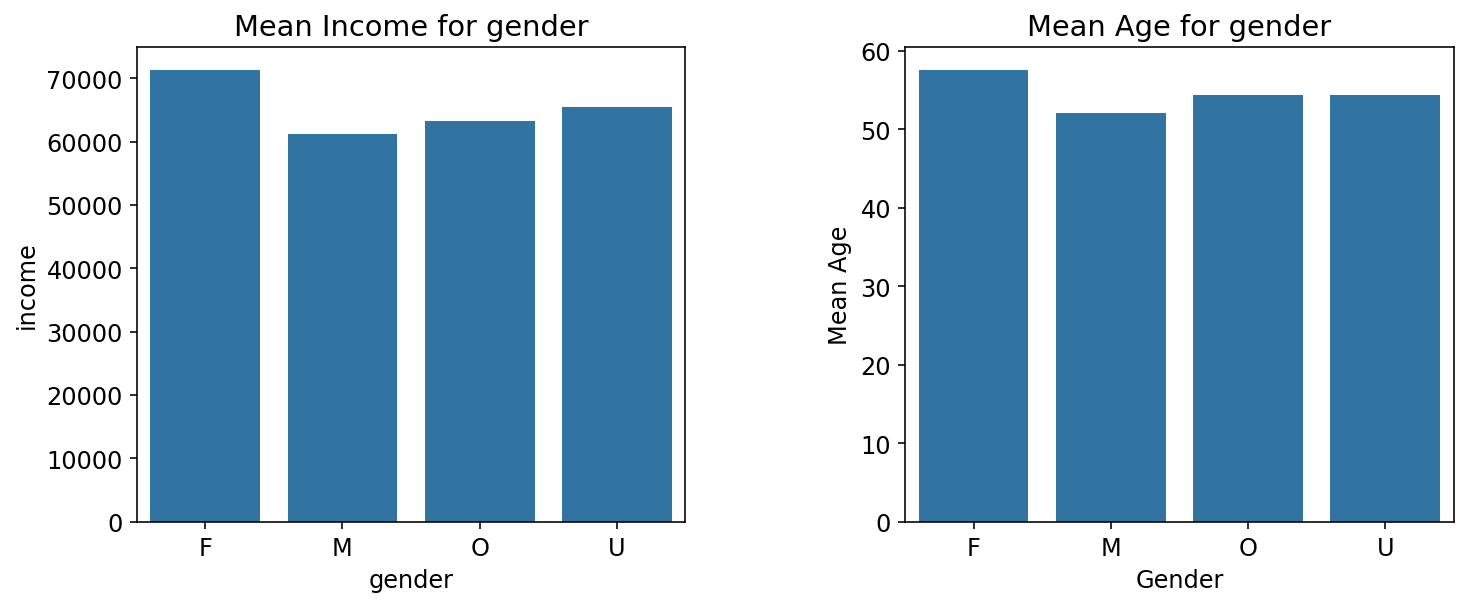

In [23]:
df = profile.groupby('gender').mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.tight_layout()
fig.subplots_adjust(wspace=.4)


sns.barplot(data=df, x='gender', y='income', color=blue, ax=ax1)
ax1.set_title('Mean Income for gender')
plt.xlabel('Gender')
plt.ylabel('Mean Income');

sns.barplot(data=df, x='gender', y='age', color=blue, ax=ax2)
ax2.set_title('Mean Age for gender')
plt.xlabel('Gender')
plt.ylabel('Mean Age');

In [24]:
df

,gender,age,income,year,month,day,member_since_days,F,M,O,U
0,F,57.544950,71306.412139,2016.634035,6.832110,3.010116,1682.155327,1.0,0.0,0.0,0.0
1,M,52.116690,61194.601603,2016.607614,6.598303,3.044554,1699.096535,0.0,1.0,0.0,0.0
2,O,54.400943,63287.735849,2016.721698,6.641509,2.910377,1656.183962,0.0,0.0,1.0,0.0
3,U,54.393524,65404.991568,2016.736092,6.601379,3.005977,1652.171034,0.0,0.0,0.0,1.0


## Offer based analysis

Now I want to know how often each offer is received, how often the offers are viewed and unviewed and how often the offers are completed and uncompleted.

In [25]:
# Define a fuction which groups and aggregate by value count and create a pivot table from this data. 
def grouped_value_counts(df, group_column, count_column, value_column_name='value'):
    '''Function the takes a dataframe and group the dataframe by the group_column, 
    creates a pivot from grouped series '''
    
    df = df.groupby(group_column)[count_column].value_counts().reset_index(name=value_column_name)
    df = df.pivot(index=group_column, columns=count_column, values=value_column_name)
    return df

### Create dataframe with viewed and completed counts per offer

First I create a dataframe with the offers as index and columns for viewed, completed, unviewed, uncompleted and the total counts of the offers. The process to do this is to group the received dataframe by person id and use the pivot function to create a dataframe. This process has to do twice, for viewed column and for completed column.
The total count will be created as series from the summation of viewed and unviewed columns.

In [26]:
viewed = received.groupby(['ticks','viewed']).size().reset_index(name='counts').\
         pivot(index='ticks', columns='viewed', values='counts')
completed = received.groupby(['ticks','completed']).size().reset_index(name='counts').\
         pivot(index='ticks', columns='completed', values='counts')
completed.columns.name = 'None'
completed

None,-1,1
ticks,,
bogo_10_10_5,4262,3331
bogo_10_10_7,3970,3688
bogo_5_5_5,3275,4296
bogo_5_5_7,3323,4354
discount_2_10_10,2265,5332
discount_2_10_7,3607,4025
discount_3_7_7,2481,5165
discount_5_20_10,4228,3440
informational_0_0_3,2877,4741


In [27]:
# Counts for viewed events
viewed = grouped_value_counts(received, 'ticks', 'viewed')

# rename -1, 1 columns to unviewed, viewed
viewed.columns = ['unviewed', 'viewed']
# Define a total series to convert values to percentages
total = viewed.sum(axis=1)
# Counts for completed events
completed = grouped_value_counts(received, 'ticks', 'completed')
# rename -1, 1 columns to unviewed, viewed
completed.columns = ['uncompleted', 'completed']

Now we merge the viewed and completed dataframes

In [28]:
# define columns order
columns = ['unviewed', 'uncompleted', 'viewed', 'completed']
# create dataframe with viewed and completed counts
viewed_completed_counts = viewed.merge(completed, on='ticks')[columns]
viewed_completed_counts['total'] = total


#### Merged count dataframe

In [29]:
print('Total received offers: {}'.format(viewed_completed_counts.total.mean()))
viewed_completed_counts.head(3)

Total received offers: 7627.7


,unviewed,uncompleted,viewed,completed,total
ticks,,,,,
bogo_10_10_5,345,4262,7248,3331,7593
bogo_10_10_7,940,3970,6718,3688,7658
bogo_5_5_5,343,3275,7228,4296,7571


All offers are around 7628 times received. The ranges for viewed and completed are with 4750 offers for viewed and 1000 offers for completed much higher.

After the data frame has been generated, the values are converted into percentages for better comparability. This is done by dividing the columns by the total values and multiplicating the values by 100.

#### Percentage rates of unviewed, viewed and uncompleted, completed counts

In [30]:
viewed_completed_counts = viewed_completed_counts.iloc[:,:-1].divide(viewed_completed_counts.total, axis=0).round(3)*100
viewed_completed_counts

,unviewed,uncompleted,viewed,completed
ticks,,,,
bogo_10_10_5,4.5,56.1,95.5,43.9
bogo_10_10_7,12.3,51.8,87.7,48.2
bogo_5_5_5,4.5,43.3,95.5,56.7
bogo_5_5_7,45.6,43.3,54.4,56.7
discount_2_10_10,3.2,29.8,96.8,70.2
discount_2_10_7,46.0,47.3,54.0,52.7
discount_3_7_7,3.8,32.4,96.2,67.6
discount_5_20_10,64.4,55.1,35.6,44.9
informational_0_0_3,19.2,37.8,80.8,62.2


There are really high unviewed and uncompleted ratios. Let's visualize this for a better view.

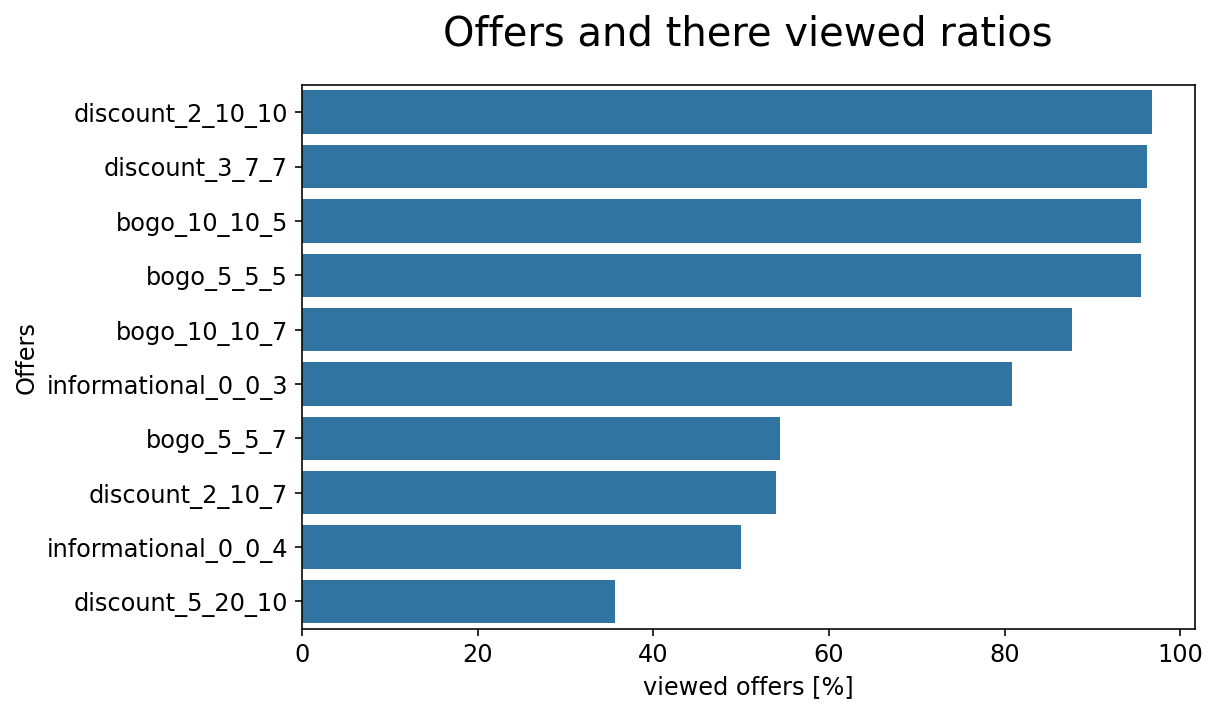

In [31]:
column = 'viewed'
df = viewed_completed_counts.sort_values(by=column, ascending=False).reset_index()

plt.figure(figsize=(8,5))

sns.barplot(data=df, y='ticks', x=column, color=blue)
plt.xlabel('{} offers [%]'.format(column));
plt.ylabel('Offers')
plt.title('Offers and there viewed ratios', fontsize=20, pad=20);


There are 4 offers with really low viewed ratios. Two offers have viewed ratios between 80% and 90%, four more offers have viewed ratios higher than 90%.
Let's have a quick view on the offer channels.

#### Add channel columns to the viewed_completed_count dataframe

In [32]:
# Merge from portfolio the channels columns to the dataframe and sort by unviewed column

df_merged = df.merge(portfolio.loc[:,['ticks', 'email', 'mobile', 'web', 'social']], left_on='ticks', right_on='ticks').\
        sort_values(by='unviewed', ascending=False)
df_merged.columns.name='index'
df_merged


index,ticks,unviewed,uncompleted,viewed,completed,email,mobile,web,social
9,discount_5_20_10,64.4,55.1,35.6,44.9,1,0,1,0
8,informational_0_0_4,50.0,37.7,50.0,62.3,1,1,1,0
7,discount_2_10_7,46.0,47.3,54.0,52.7,1,1,1,0
6,bogo_5_5_7,45.6,43.3,54.4,56.7,1,1,1,0
5,informational_0_0_3,19.2,37.8,80.8,62.2,1,1,0,1
4,bogo_10_10_7,12.3,51.8,87.7,48.2,1,1,0,1
2,bogo_10_10_5,4.5,56.1,95.5,43.9,1,1,1,1
3,bogo_5_5_5,4.5,43.3,95.5,56.7,1,1,1,1
1,discount_3_7_7,3.8,32.4,96.2,67.6,1,1,1,1
0,discount_2_10_10,3.2,29.8,96.8,70.2,1,1,1,1


As we can see on the table above, the unviewed ratio depends directly on the used channels.
The offer with the highest unviewed ratio the channels 'mobile' and 'social' are not used.
The next three offers have no 'social' channel used. The offers with unviewed ratios between 10% and 20% have no web channels used. From these observations I find that the social channel is the most important, followed by the mobile and web channels.

Let's go on and ask vor the completed offer ratios.

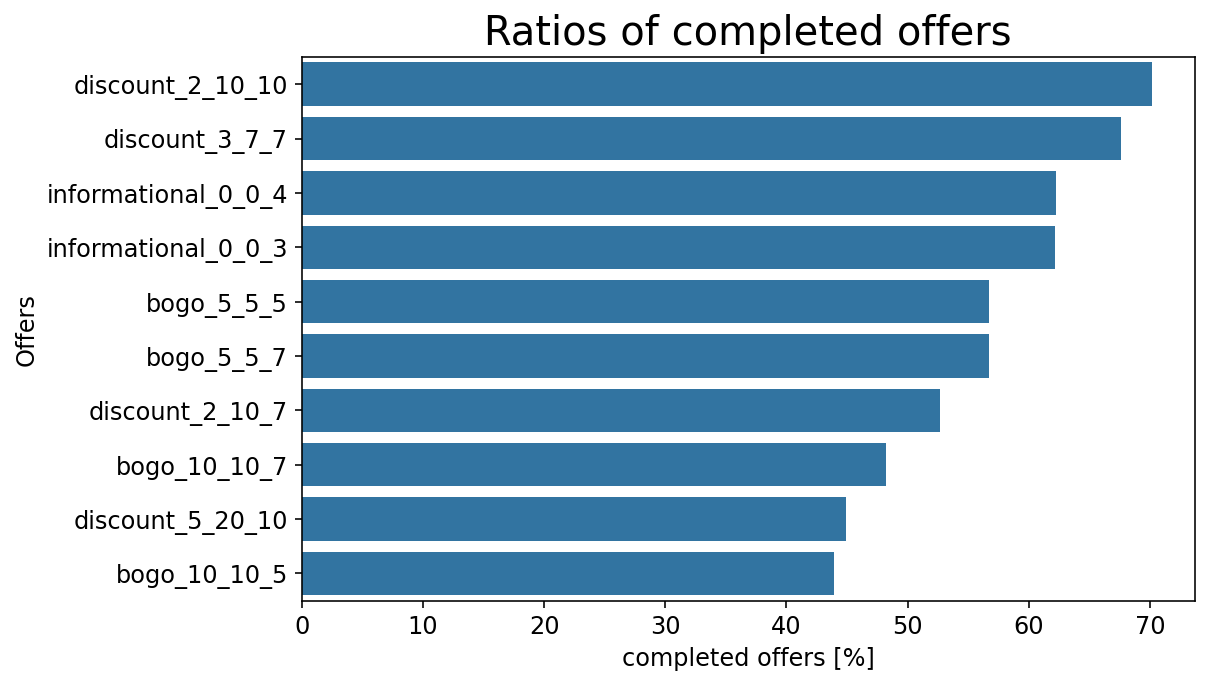

In [33]:
column = 'completed'
df = viewed_completed_counts.sort_values(by=column, ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=df, y='ticks', x=column, color=blue)
plt.xlabel('{} offers [%]'.format(column));
plt.ylabel('Offers')
plt.title('Ratios of {} offers'.format(column), fontsize=20);



As we can see, the completed ratios decreasing more continuously. 

The general trends how popular an offer is are.
* Less difficulty is better
* More duration is better
* Discount is better than bogo

Let's check if the order of uncompleted offers follows the order of unviewed offers and add the unviewed ratios to the plot

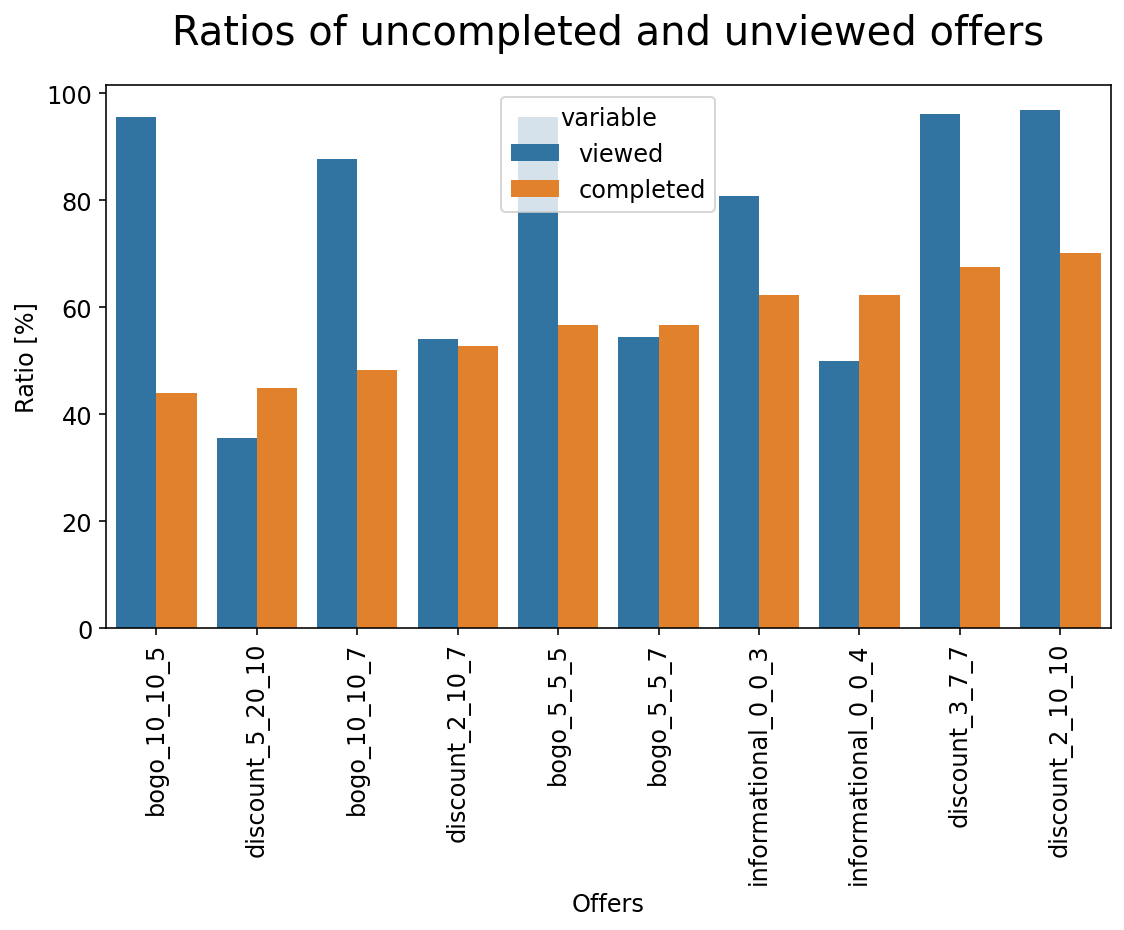

In [38]:
column = 'completed'
df = viewed_completed_counts.sort_values(by=column, ascending=True).reset_index()
melt_df = df.melt(id_vars=['ticks', 'uncompleted', 'unviewed'])


plt.figure(figsize=(9,5))
sns.barplot(data=melt_df, x='ticks', y='value', hue='variable', hue_order=['viewed', 'completed'])
plt.ylabel('Ratio [%]');
plt.xlabel('Offers')
plt.xticks(rotation=90)
plt.title('Ratios of uncompleted and unviewed offers', fontsize=20, pad=20);




Here we can see some nice hints about the general pupularity of offers.
**bogo_10_10_5** belongs to the offers with really high viewed rate, but the completion rate is poor. On the other side there are offers like **informational_0_0_4**, with a poor viewed rate but in the completion rate in rank 4. 

In [39]:
df = viewed_completed_counts.corr()
df.columns.name='index'
df

index,unviewed,uncompleted,viewed,completed
unviewed,1.000000,0.306593,-1.000000,-0.306593
uncompleted,0.306593,1.000000,-0.306593,-1.000000
viewed,-1.000000,-0.306593,1.000000,0.306593
completed,-0.306593,-1.000000,0.306593,1.000000


In [40]:
correlation = viewed_completed_counts.corr().loc['viewed', 'completed']
print('The correlation between viewed and completed has a value of {}'.format(round(correlation,3)))

The correlation between viewed and completed has a value of 0.307


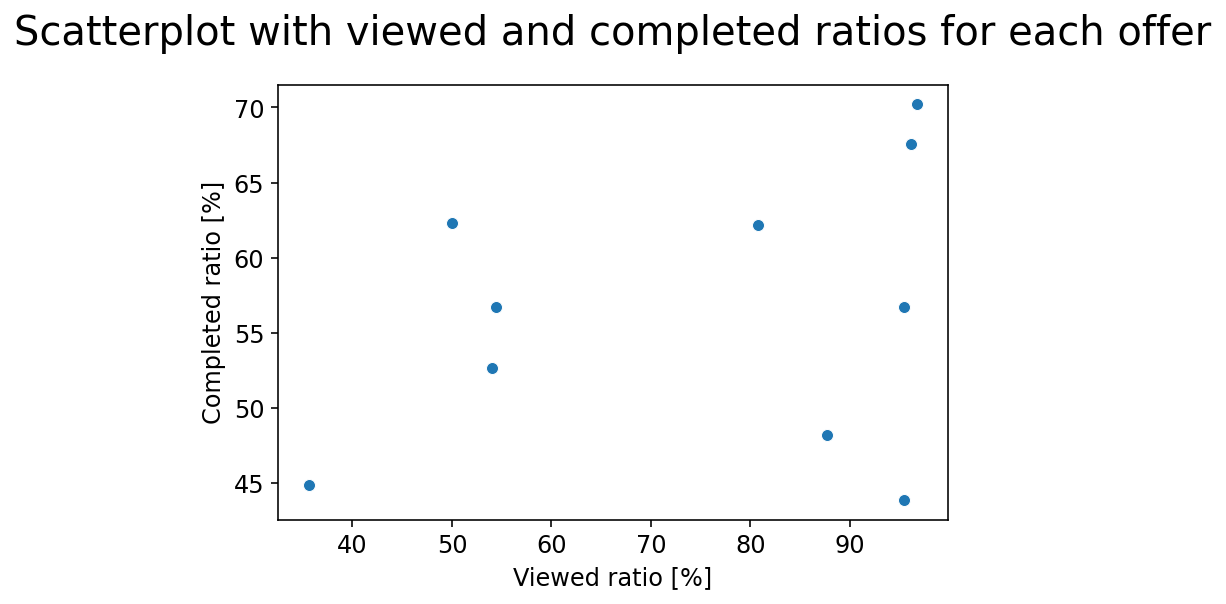

In [41]:
sns.scatterplot(data=viewed_completed_counts, x='viewed', y='completed')
plt.xlabel('Viewed ratio [%]');
plt.ylabel('Completed ratio [%]')
plt.title('Scatterplot with viewed and completed ratios for each offer', fontsize=20, pad=20);



As we can see there are offers with high uncompleted ratios, while the unviewed ratios for these offers are low. Also there are offers with high uncompleted ratios and high unviewed ratios. We can say that there are offers which are really unpopular, while other offers maybe not completed, because they are not viewed. In general the correlation between viewed and completed ratios is with 0.307 very low. 



## Customer based analysis

* How many offers have the customers received? 
* Sort the customer by viewed rate, based on received offers
* Sort the customer by completed rate, based on viewed offers


### How many customers have one ore more offers received?

In [42]:
received.person_id.nunique()

16994

From 17000 customers 16994 customers have received an offer. That is close to 100%. There are 6 customers who do not received an offer.



### How is the customer count in relation to the received count per customer?

Let's ask the question how many offers the customers received

Text(0, 0.5, 'Customer count')

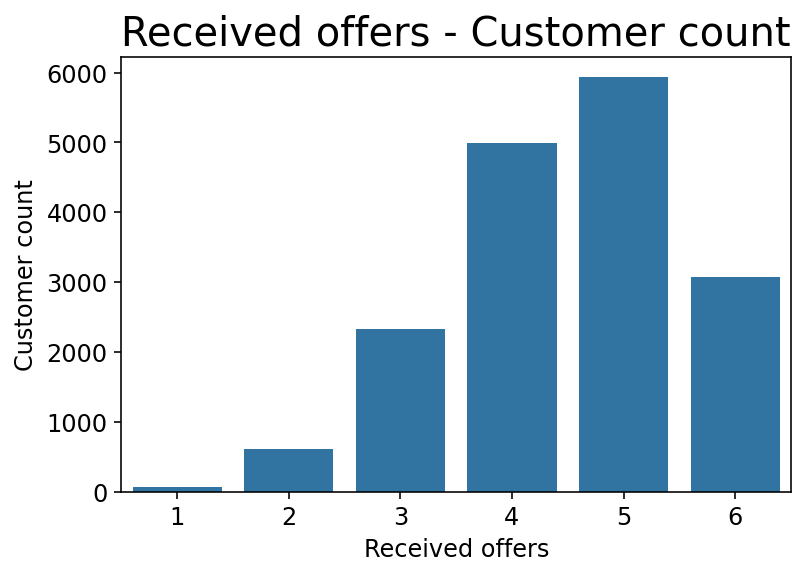

In [43]:
received_count = received.groupby('person_id').size().reset_index(name='received')
received_count.received.value_counts()
sns.countplot(data=received_count, x='received', color=blue)
plt.title('Received offers - Customer count', fontsize=20)
plt.xlabel('Received offers')
plt.ylabel('Customer count')

In [44]:
received_count.groupby('received').size().reset_index(name='received_count')

,received,received_count
0,1,73
1,2,610
2,3,2325
3,4,4988
4,5,5931
5,6,3067


Most customer received between 3 and 6 offers. Therefore we have ten different offers, there are no customer who received all offers.

How many from these received offers are viewed? Can I expect that customers who received a lot of offers also viewed a lot of offers?.

Let's attach the customer viewed count and the customer completed count for the received offers.


In [45]:
# Create counts for received, viewed, completed values grouped by person id
#received_count = received.groupby('person_id').size().reset_index(name='received')
viewed_count = received.query('viewed == 1').groupby('person_id').size().reset_index(name='viewed')
completed_count = received.query('completed == 1').groupby('person_id').size().reset_index(name='completed')

# create a merged dataframe with all counts inside
all_count = received_count.merge(viewed_count, left_on='person_id', right_on='person_id', how='outer').\
              merge(completed_count, left_on='person_id', right_on='person_id', how='outer').\
              fillna(0)

all_count.columns.name='index'
all_count.head(3)

index,person_id,received,viewed,completed
0,0009655768c64bdeb2e877511632db8f,5,4.0,5.0
1,00116118485d4dfda04fdbaba9a87b5c,2,2.0,0.0
2,0011e0d4e6b944f998e987f904e8c1e5,5,5.0,3.0


63639
63126
62314

Now I have for each customer the received, viewed and completed counts. When I group this dataframe by the received count and count the corresponding values for viewed, I get a table with the viewed offers based on the received offers.'


In [46]:
# Group the dataframe by received values count the values in viewed column
df_viewed = all_count.groupby('received').viewed.value_counts().reset_index(name='count')
print('Example table for 4 received offers and the cosrresponding viewed counts.')
df_viewed.query('received == 4')

Example table for 4 received offers and the cosrresponding viewed counts.


,received,viewed,count
9,4,4.0,1865
10,4,3.0,1632
11,4,2.0,1100
12,4,1.0,339
13,4,0.0,52


Let's plot a bar diagramm to visualize how is the viewed distribution dependent from the received offers.

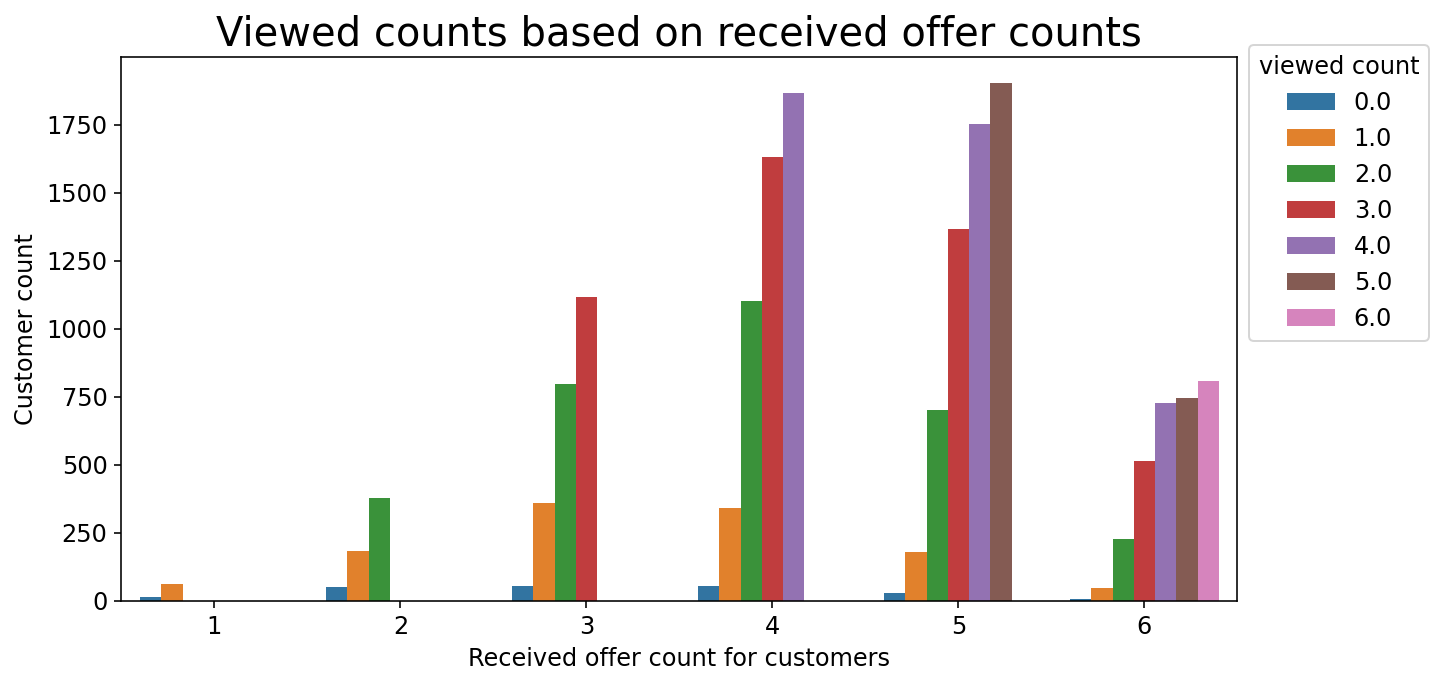

In [47]:

plt.figure(figsize=(10,5))
sns.barplot(data=df_viewed, x='received', y='count', hue='viewed')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75), title='viewed count')
plt.xlabel('Received offer count for customers')
plt.ylabel('Customer count')
plt.title('Viewed counts based on received offer counts', fontsize=20);


Let's plot the table as an additional explanation.

In [48]:
df_viewed_pivot = df_viewed.pivot(index='received', columns='viewed', values='count').fillna('-')
df_viewed_pivot.index.name=None
df_viewed_pivot

viewed,0.0,1.0,2.0,3.0,4.0,5.0,6.0
1,12.0,61.0,-,-,-,-,-
2,50.0,184.0,376,-,-,-,-
3,53.0,360.0,797,1115,-,-,-
4,52.0,339.0,1100,1632,1865,-,-
5,29.0,180.0,700,1366,1753,1903,-
6,5.0,47.0,226,512,727,744,806


Customers who received many offers, also viewed many offers. There is no situation i.e. that most customers who received 5 offers only viewed 2. 

Let's check if the completed counts have a similar situation. 

In [49]:
df_completed = all_count.groupby('received').completed.value_counts().reset_index(name='count')
df_completed.head(3)


,received,completed,count
0,1,1.0,43
1,1,0.0,30
2,2,2.0,239


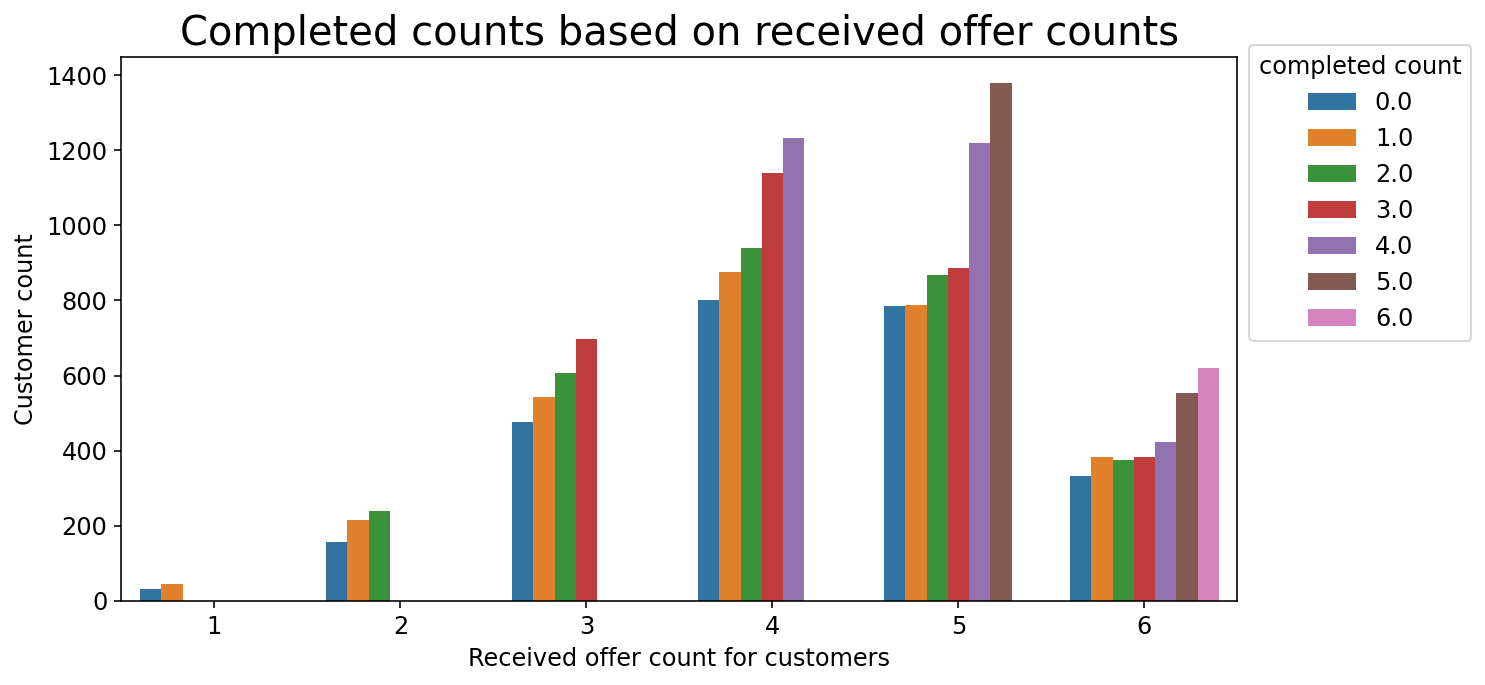

In [50]:

plt.figure(figsize=(10,5))
sns.barplot(data=df_completed, x='received', y='count', hue='completed')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75), title='completed count')
plt.xlabel('Received offer count for customers')
plt.ylabel('Customer count')
plt.title('Completed counts based on received offer counts', fontsize=20);

In [122]:
df_completed.pivot(index='received', columns='completed', values='count').fillna('-')

completed,0.0,1.0,2.0,3.0,4.0,5.0,6.0
received,,,,,,,
1,30.0,43.0,-,-,-,-,-
2,155.0,216.0,239,-,-,-,-
3,477.0,542.0,608,698,-,-,-
4,800.0,876.0,939,1140,1233,-,-
5,786.0,789.0,869,887,1220,1380,-
6,332.0,383.0,374,383,423,553,619


Customers who received many offers, also completed many offers. There is no situation i.e. that most customers who received 5 offers only completed 2. The situation is quite similar to the viewed counts.


#### Conclusion about received, viewed, and completed counts.
We can see that received, viewed and completed counts are ok. There is no situation where customers received i.e. 5 offers and the fewest where viewing 5 and the most viewing only one or nothing. 
But there is still no information about the customers and their individual behavior on offers.


### Viewed, Completed ratios for each customer.

Up to here we worked with total count values. Let's dive a little more deeper and check how are the viewed rates and completed rates (based on viewed offers) for individuel customers.



#### Find customers received viewed ratios

Let's create a table where the viewed and unviewed counts for each customer and the viewed ratio is available.

In [51]:
# Group the received dataframe and create a value count on viewed column
df = received.groupby('person_id').viewed.value_counts().reset_index(name='count')
# Convert the dataframe with pivot and fill nan values with 0
df = df.pivot(index='person_id', columns='viewed', values='count').fillna(0)
# Rename columns from -1, 1 to unviewed, viewed
df.columns = ['unviewed', 'viewed']
# define the unviewed ration column
df['viewed_ratio'] = ((df['viewed'] / (df['unviewed'] + df['viewed']))*100).round(2)
# copy the dataframe to specific name 
viewed = df.copy()
print(viewed.shape)
viewed.columns.name='person_id'
viewed.index.name = None
viewed.head(3)

(16994, 3)


person_id,unviewed,viewed,viewed_ratio
0009655768c64bdeb2e877511632db8f,1.0,4.0,80.0
00116118485d4dfda04fdbaba9a87b5c,0.0,2.0,100.0
0011e0d4e6b944f998e987f904e8c1e5,0.0,5.0,100.0


Now I have the viewed, unviewed count and the viewed ratio for each customer. I will visualize how is the customer count over the viewed ratios.

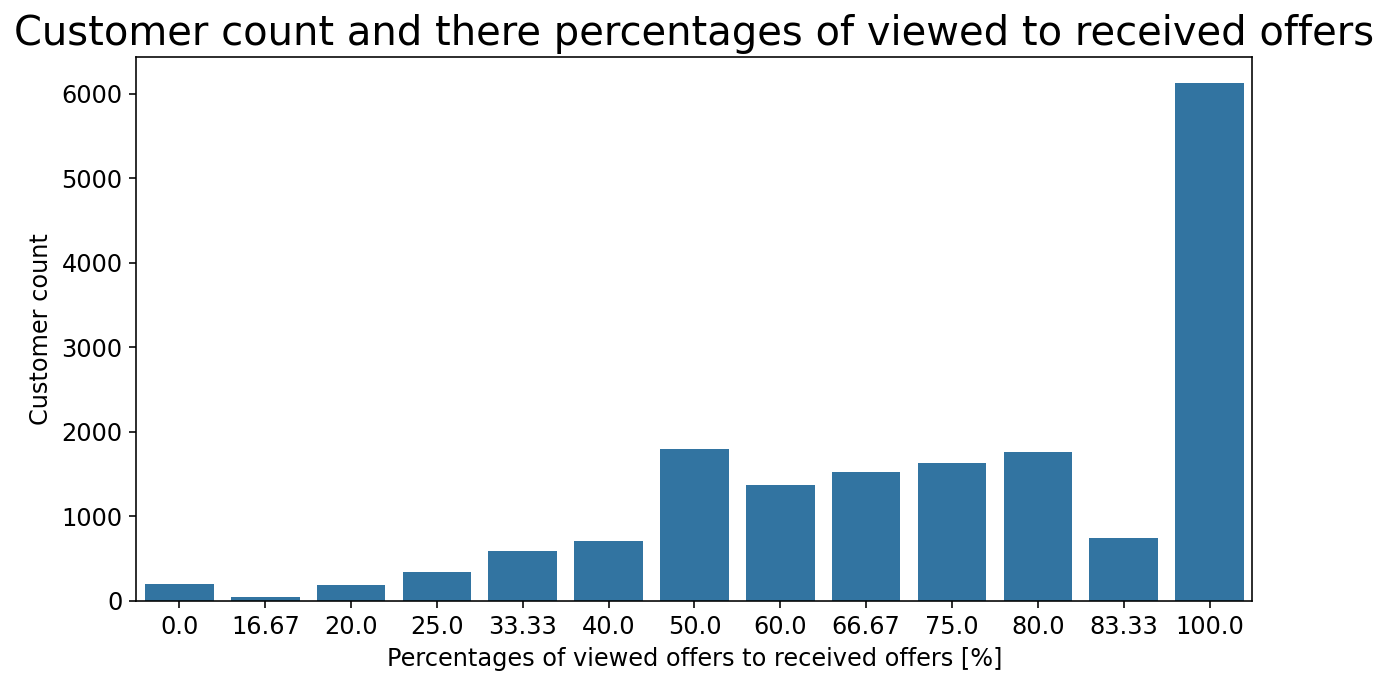

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data=viewed, x='viewed_ratio', color=blue)
plt.xlabel('Percentages of viewed offers to received offers [%]')
plt.ylabel('Customer count')
plt.title('Customer count and there percentages of viewed to received offers', fontsize=20);

In [55]:
viewed.groupby('viewed_ratio').size().reset_index(name='ratio_count')

,viewed_ratio,ratio_count
0,0.00,201
1,16.67,47
2,20.00,180
3,25.00,339
4,33.33,586
5,40.00,700
6,50.00,1796
7,60.00,1366
8,66.67,1524
9,75.00,1632


In [56]:
ratio_viewed = viewed.query('viewed_ratio >= 50.').shape[0] / viewed.shape[0] 
ratio_viewed_50 = round(ratio_viewed*100 ,1)
print('{}% of customers viewed more than 50% of their received offers.'.format(ratio_viewed_50))

87.9% of customers viewed more than 50% of their received offers.


Most of the customers viewed every offer. 201 customers never viewed an offer. In general we have 87.9% customers who viewed more than 50% of offers.



There are 201 customers who never viewed a received offer and 6126 customers who viewed every offer they received. In general 87.9% of customers viewed more the 50% of received offers.

Let's do the same process for the completed rates,  based on the viewed offers.


In [57]:
# Same process as before for completed column but only for viewed offers
df = received.query('viewed == 1').groupby('person_id').completed.value_counts().reset_index(name='count')
df = df.pivot(index='person_id', columns='completed', values='count').fillna(0)
df.columns = ['uncompleted', 'completed']
df['completed_ratio'] = ((df['completed'] / (df.sum(axis=1)))*100).round(2)
completed = df.copy()
completed.head(3)


,uncompleted,completed,completed_ratio
person_id,,,
0009655768c64bdeb2e877511632db8f,0.0,4.0,100.0
00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0
0011e0d4e6b944f998e987f904e8c1e5,2.0,3.0,60.0


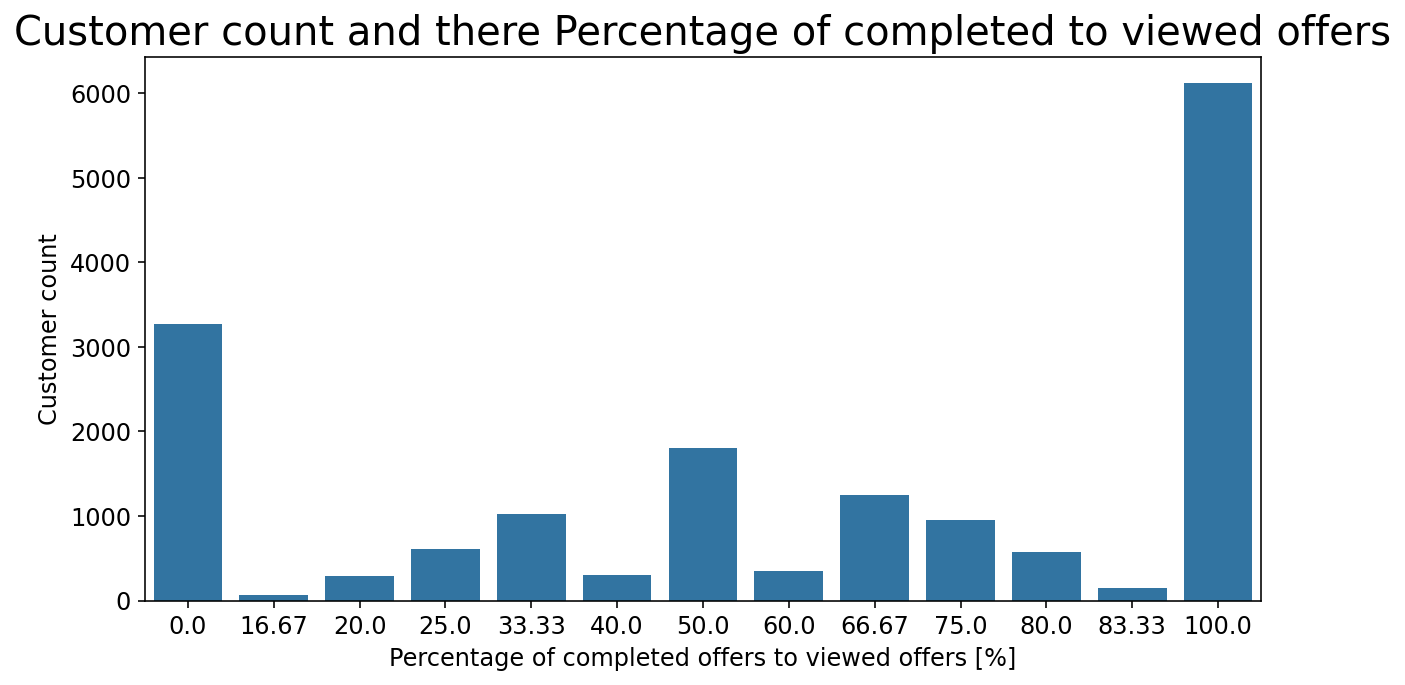

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(data=completed, x='completed_ratio', color=blue)
plt.xlabel('Percentage of completed offers to viewed offers [%]')
plt.ylabel('Customer count')
plt.title('Customer count and there Percentage of completed to viewed offers', fontsize=20);

In [59]:
ratio_completed = completed.query('completed_ratio >= 50.').shape[0] / viewed.shape[0] 
ratio_completed_50 = round(ratio_completed*100 ,1)
print('{}% of customers completed more than 50% of their viewed offers.'.format(ratio_completed_50))

66.0% of customers completed more than 50% of their viewed offers.


In [60]:
completed.groupby('completed_ratio').size().reset_index(name='customer_count')

,completed_ratio,customer_count
0,0.00,3274
1,16.67,70
2,20.00,293
3,25.00,615
4,33.33,1027
5,40.00,304
6,50.00,1810
7,60.00,351
8,66.67,1251
9,75.00,956


There are 3274 customers who never completed a viewed offer and 6126 customers who completed every offer they viewed. In general 66.0% of customers completed more the 50% of viewed offers.

We can see that the customer counts for 100% viewed rate and 100% completed rate are quite similar. Let's check how is the intersection of this two customers groups.


In [61]:
viewed_customers = viewed.query('viewed_ratio == 100').index
completed_customers = completed.query('completed_ratio == 100').index
intersect_customer = np.intersect1d( viewed_customers, completed_customers)
intersect_customer_count = intersect_customer.size
print('{} customers are in both groups'.format(intersect_customer_count))

2146 customers are in both groups


There are only 2146 customers are in both groups. That is much fewer than I expected. We can see that a high view rate is not directly a high completed rate. 

In [62]:
viewed.shape, completed.shape
viewed.reset_index()
viewed_completed = viewed.merge(completed, left_index=True, right_index=True)
viewed_completed.head(3)

,unviewed,viewed,viewed_ratio,uncompleted,completed,completed_ratio
0009655768c64bdeb2e877511632db8f,1.0,4.0,80.0,0.0,4.0,100.0
00116118485d4dfda04fdbaba9a87b5c,0.0,2.0,100.0,2.0,0.0,0.0
0011e0d4e6b944f998e987f904e8c1e5,0.0,5.0,100.0,2.0,3.0,60.0


In [63]:
np.arange(1,50,5)

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])

,viewed_ratio,completed_ratio,ratio_combination_count
53,100.00,100.00,2146
41,100.00,0.00,852
16,50.00,100.00,732
34,80.00,100.00,584
25,66.67,100.00,560
29,75.00,100.00,552
47,100.00,50.00,489
20,60.00,100.00,485
12,50.00,0.00,484
28,75.00,66.67,427


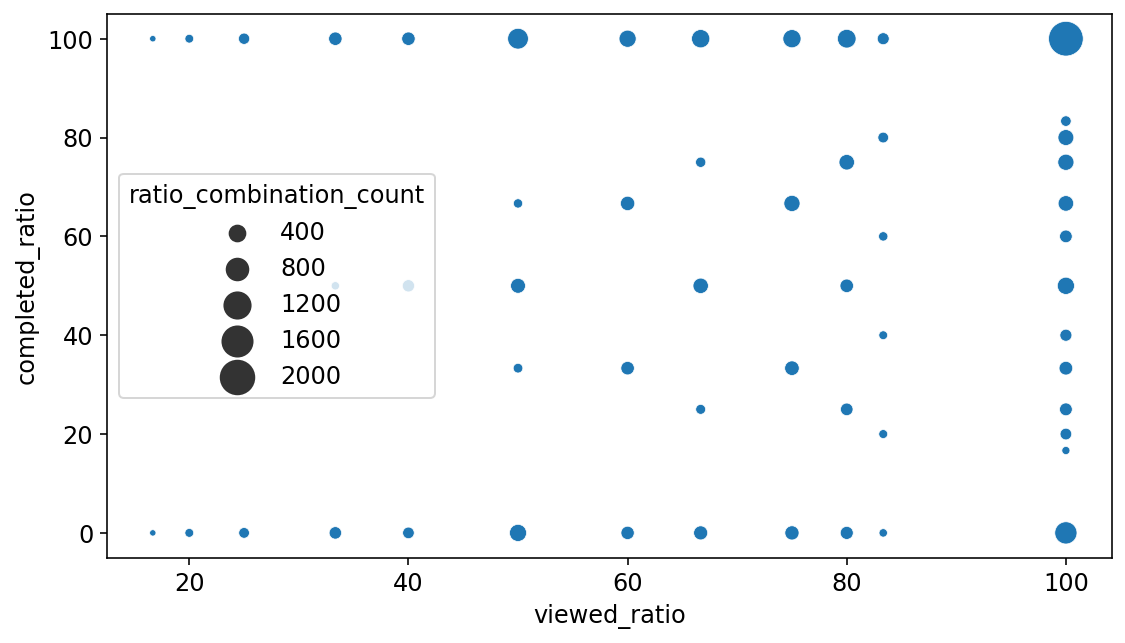

In [66]:
df = viewed_completed.groupby(['viewed_ratio', 'completed_ratio']).size().reset_index(name='ratio_combination_count')
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='viewed_ratio', y='completed_ratio', size='ratio_combination_count', sizes=(10,300))
df.sort_values(by='ratio_combination_count', ascending=False)

I am really surprised about these results. It seems that there is completely no correlation between the viewed ratio and the completed ratio based on the individual customer behavior. The corresponding scatterplot shows an extrem symmetric situation. 
Of course the highest combination count is for 100% viewed and 100% completed. But also with this combination counts the situation looks relative symmetric.



### Conclusion of Customers based viewed and completed ratios

The viewed rate of offers is better than the completed rate. There are a few customers who are not interested to check the channels. Maybe they are in a digital detox phase. 
From my point of view it is also suprising that there are 3247 customers who never completed any offer. Maybe they are in general not interested in offers or maybe they did not received the correct offers for them.

Let's dive into the customers never completed a viewed offer and analyse it a little bit more detailed.



### Customer analyis of customers never completed an viewed offer.

First I want to know how many offers the customers viewed.

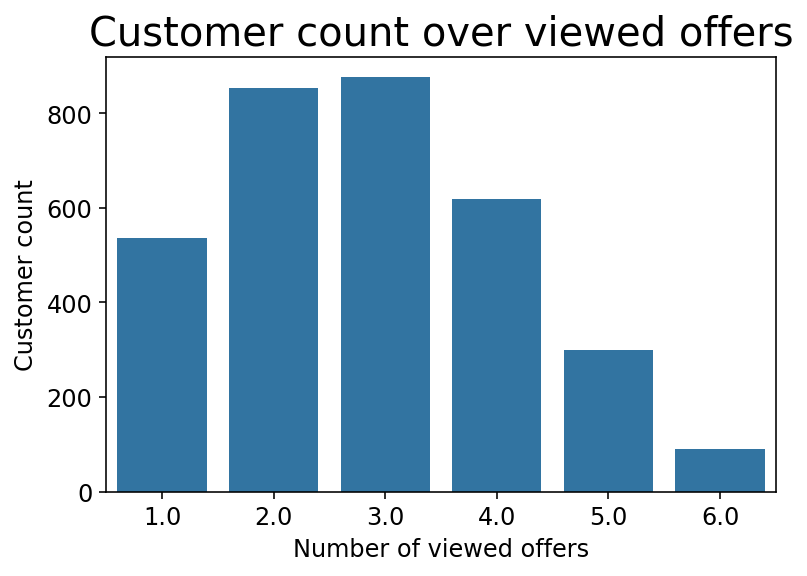

In [134]:
# Extract customers never completed an offer
df = completed.query('completed_ratio == 0')
never_completed_customer = df.query('completed_ratio == 0').index

sns.countplot(data=df, x='uncompleted',color=blue)
plt.xlabel('Number of viewed offers')
plt.ylabel('Customer count')
plt.title('Customer count over viewed offers', fontsize=20);

In [135]:
df.groupby('uncompleted').size().reset_index(name='customer_count')

,uncompleted,customer_count
0,1.0,537
1,2.0,853
2,3.0,876
3,4.0,618
4,5.0,300
5,6.0,90



From the 3247 customers who never completed an offer 2737 viewed two or more offers. Which offers has this customers viewed?

In [136]:
received[received.person_id.isin(never_completed_customer)].groupby('ticks').size().reset_index(name='viewed_count')

,ticks,viewed_count
0,bogo_10_10_5,1628
1,bogo_10_10_7,1615
2,bogo_5_5_5,1382
3,bogo_5_5_7,1537
4,discount_2_10_10,1206
5,discount_2_10_7,1619
6,discount_3_7_7,1224
7,discount_5_20_10,1585
8,informational_0_0_3,993
9,informational_0_0_4,1343


As we can see, the customers who never completed a viewed offer, received and viewed all 10 offers with a mean count of 1400 times. It seems that this is a problem of customers and not of offers. But from previous investigations we know the indiviual customers received only only up to 6 different offers. How is the received offer distribution for this special customer group?

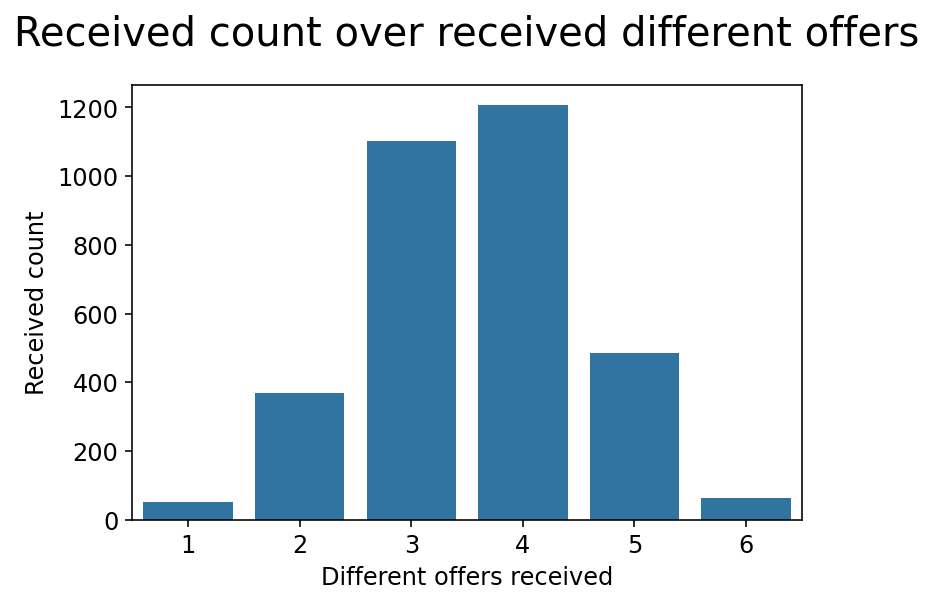

In [137]:
# Get the value_counts for each offer per customer
df = received[received.person_id.isin(never_completed_customer)].groupby(['person_id', 'ticks']).size().reset_index(name='offer_count')
# Transfer the dataframe 
df = df.pivot(index='person_id', columns='ticks', values='offer_count')
# Count over axis 1 the different offers.
df = df.count(axis=1).reset_index(name='different_offers')

sns.countplot(data=df, x='different_offers', color=blue)
plt.xlabel('Different offers received')
plt.ylabel('Received count')
plt.title('Received count over received different offers', fontsize=20, pad=20);

In [138]:
df_grouped = df.groupby('different_offers').size().reset_index(name='count')
df_grouped

,different_offers,count
0,1,51
1,2,368
2,3,1103
3,4,1206
4,5,484
5,6,62


As we can see the customer never completed an offer received up to 6 different offers. but around 66% recieved 3 and 4 different offers. There is definitely a possibility that customers will accept other offers, they have not received yet.

## Power Customer
Find top customers which stands for 80% of regular transactions

In [139]:
# Extract transaction events
transaction = full_df[full_df.transaction == 1]
# Caluculate the total amount
total_amount = transaction.amount.sum()
# define a treshold for the power customers
treshold = 0.8

# Group the transactions by person, sum the amount and sort it by ammount summation
power_customer = transaction.groupby('person_id').amount.sum().sort_values(ascending=False).reset_index(name='amount')

# Create a power customer column and fill it with 0
power_customer['power_customer'] = 0

# Create cummulated summation of ammount from sorted customer amounts
power_customer['cummulated_amount'] = power_customer.amount.sort_values(ascending=False).cumsum()

# Define the index where the cummulated amount < total_amount * treshold
idx = power_customer[power_customer.cummulated_amount < total_amount * treshold].index

# For the defined index set the values in power customer to 1
power_customer.loc[idx, 'power_customer'] = 1

power_customer.power_customer.value_counts()

0    9675
1    6903
Name: power_customer, dtype: int64

For the defined treshold of 80% of total amount there are 6903 power customers.

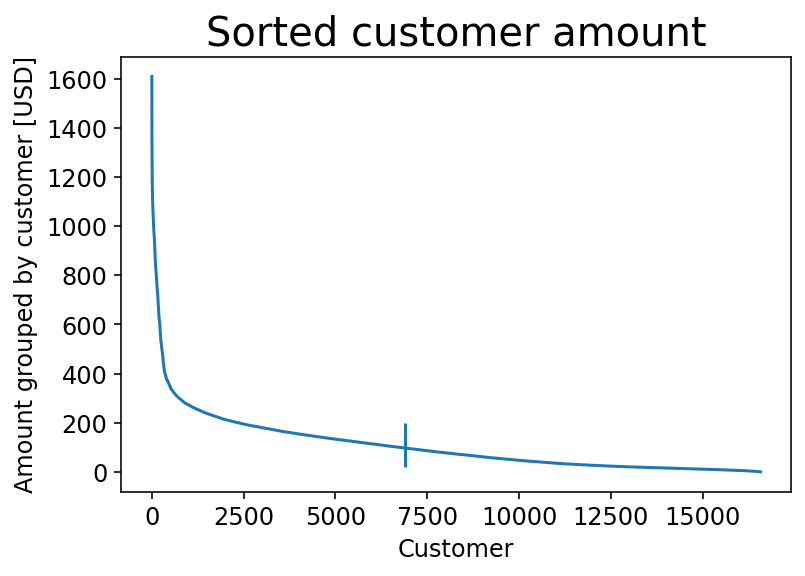

In [140]:
plt.plot(power_customer.amount)
plt.vlines(x=6903, ymin=20, ymax=200)
plt.xlabel('Customer')
plt.ylabel('Amount grouped by customer [USD]')
plt.title('Sorted customer amount', fontsize=20);

This plot looks very interesting. There are a view customers with amounts > 400 USD and many customers with amounts > 400 USD. The vertical line marks the power customers based on the defined treshold of 80% from total amount. 

# Summary of Exploratory Data Analysis.

Based on this explorative data analysis it is not possible to define who customers will prefer which offers. Of course we can make a detailed customer feature analysis for each provided and completed and uncumpleted offer. From my point of view that makes not much sense. 

We have also seen that there are offers with really bad viewed ratios and we have seen that this depends definetely on the channels which used to receive the offer. 

To go on and find out which offers we can provide to our customer I will go on with the following process. 
I will create a dataframe where I have the viewed rate for each customer and offer. Is this viewed rate above or equel to 50% The viewed label for this customer offer combination is set to 1. Is the rate below 50% the label will be set to 0. 

This dataset from customer offer combinations with the corresponding viewed labels is the baseline for a machine learning  model.


The same process I will do based on the completed offers. With this machine learning models I predict the labels for the missing customer offer combinations. 
Based on this predictions we can go in a detailed analysis of customer offer combinations.

# Stuff from previous


### Create an overview table with viewed completed value counts and with unviewed completed counts

We can see that there are customer offer combinations in the dataset, where customers complete an offer, but they haven't viewed this offer before. Let's create a table that shows the values in a matrix

In [20]:
# Completed counts for viewed offers
viewed = received.query('viewed == 1').completed.value_counts()
# Completed counts for unviewed offers
unviewed = received.query('viewed == -1').completed.value_counts()

# Create table from series viewed and unviewed
df = pd.DataFrame([unviewed, viewed], index=['unviewed', 'viewed'])
df.columns = ['uncompleted', 'completed']
df

,uncompleted,completed
unviewed,10893,8489
viewed,22270,34625


There are 8489 completed offers which are not viewed before. How to deal with this offers? 

I could drop this offers from the machine learning data, because the customers are not affected by offer. I think it would be better to keep this data in machine learning data, because the customers go to starbucks and make the necessary transactions which complete the offer. 

Another question would be, the customers who completed unviewed offers, not to support with offers. How ever let's dive deeper in this unviewed completed data rows and create a dataframe only with this customer offer combinations.

In [89]:
# create dataframe with viewed == -1 and completed == 1
unviewed_completed = received.query('viewed == -1 and completed == 1')
unviewed_completed.head(3)

,gender,age,person_id,became_member_on,income,year,month,day,member_since_days,time,...,reward,difficulty,duration,offer_type,email,mobile,social,web,validity,ticks
7,F,40.0,440cf1fd7580490c971d8c651ed962af,2016-05-04,71000.0,2016,5,Wednesday,1965,576,...,2.0,10.0,168.0,discount,1.0,1.0,0.0,1.0,744.0,discount_2_10_7
13,O,53.0,d1ede868e29245ea91818a903fec04c6,2017-09-16,52000.0,2017,9,Saturday,1465,336,...,2.0,10.0,168.0,discount,1.0,1.0,0.0,1.0,504.0,discount_2_10_7
14,F,96.0,868317b9be554cb18e50bc68484749a2,2017-11-17,89000.0,2017,11,Friday,1403,0,...,2.0,10.0,168.0,discount,1.0,1.0,0.0,1.0,168.0,discount_2_10_7


#### How many customers and how many offers are affected?

For the give 8499 customer offer combinations I want to know who are the affected customers ans which are the affected offers. Let's calculate this values

In [90]:
num_customer = unviewed_completed.person_id.nunique()
num_offers = unviewed_completed.ticks.nunique()

print('Affected customers: {}\nAffected offers: {}'.format(num_customer, num_offers))

Affected customers: 6247
Affected offers: 10


All offers are affected and for the 8489 completed offers we have 6247 customers. Are this customers who generally do not viewed any offers? Let's analyse the received offers only with this affected customers.

### Received offer situtation for affected customers

In [23]:
customers = unviewed_completed.person_id.unique()
df = received[received.person_id.isin(customers)]
# viewed and unviewed offers
viewed_offers = df.viewed.value_counts()[1]
unviewed_offers = df.viewed.value_counts()[-1]


size = df.shape[0]
viewed_completed_count = df.query('completed == 1').viewed.value_counts()[1]
print('The affected customers have in total {} offers received.'.format(size))
print('From this received offers are {} viewed and {} unviewed. \n\
Therefore it is not possible to generalize that this customers never viewed any offers.'\
       .format(viewed_offers, unviewed_offers))
print('This customers have also a completed count of {} from their viewed offers'.format(viewed_completed_count))

The affected customers have in total 29539 offers received.
From this received offers are 17549 viewed and 11990 unviewed. 
Therefore it is not possible to generalize that this customers never viewed any offers.
This customers have also a completed count of 12608 from their viewed offers


The affected customers have in total 29539 offers received.
From this received offers are 17549 viewed and 11990 unviewed. 
Therefore it is not possible to generalize that this customers never viewed any offers.
This customers have also a completed count of 12608 from their viewed offers



Let's search for customer who never viewed any offer.

In [24]:
df = received.groupby('person_id').viewed.value_counts().reset_index(name='viewed_count')
df = df.pivot(index='person_id', columns='viewed', values='viewed_count')
customers = df[1].dropna().index
bad_customer = df[~df.index.isin(customers)]
bad_customer_count = bad_customer.shape[0]
print('There are in total {} customers who never viewed any offers.'.format(bad_customer_count))

There are in total 201 customers who never viewed any offers.


There are in total 201 customers who never viewed any offers. The qestion is, are the offers or better the channel of the offers the problems or are the customer itself the problem. Let's check which offers the customer received.

In [25]:
affected_offers = received[received.person_id.isin(bad_customer.index)].ticks.value_counts().reset_index(name='offer_count')
affected_offers = affected_offers.merge(portfolio, left_on='index', right_on='ticks').loc[:,['index', 'offer_count', 'email', 'mobile', 'social', 'web']]
affected_offers

,index,offer_count,email,mobile,social,web
0,discount_5_20_10,179,1,0,0,1
1,informational_0_0_4,139,1,1,0,1
2,discount_2_10_7,119,1,1,0,1
3,bogo_5_5_7,112,1,1,0,1
4,bogo_10_10_7,37,1,1,1,0
5,informational_0_0_3,35,1,1,1,0
6,bogo_10_10_5,12,1,1,1,1
7,discount_2_10_10,8,1,1,1,1
8,discount_3_7_7,7,1,1,1,1
9,bogo_5_5_5,6,1,1,1,1


As expected the highest counts of unviewed offers are the offers, which received without social channel. We can say that the offer channels have an impact of the never viewed customers. But this is not the stand alone reason. Let's check the completed offers for customers never viewed an offer. 

In [26]:
index=['uncompleted', 'completed']
df = received[received.person_id.isin(bad_customer.index)].completed.value_counts().reset_index(name='completed_count')
df.index = index
df = df.drop(columns='index')
df

,completed_count
uncompleted,441
completed,213


The customers never viewed an offer has 213 completed offers and 441 offers are not completed. Let's have a detailed view on this customers

In [27]:
never_viewed_customer = profile[profile.person_id.isin(bad_customer.index)]
never_viewed_customer.describe()

,age,income,year,month,day,member_since_days
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,54.534711,65874.103681,2016.786070,6.731343,2.840796,1623.243781
std,16.174590,22436.526117,1.062546,3.371567,1.993622,356.049555
min,20.000000,30000.000000,2013.000000,1.000000,0.000000,1164.000000
25%,44.000000,50000.000000,2016.000000,4.000000,1.000000,1353.000000
50%,54.393524,65404.991568,2017.000000,7.000000,3.000000,1504.000000
75%,66.000000,79000.000000,2018.000000,10.000000,5.000000,1871.000000
max,95.000000,116000.000000,2018.000000,12.000000,6.000000,2919.000000


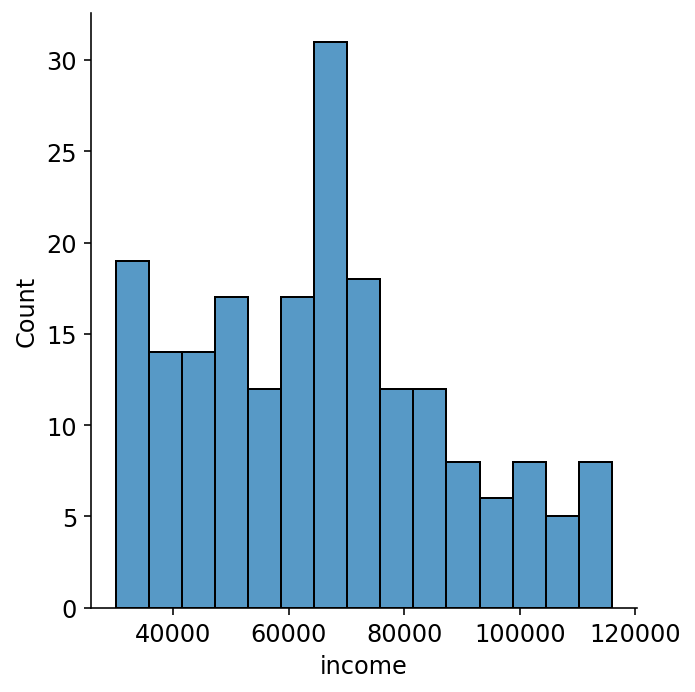

In [28]:
sns.displot(data=never_viewed_customer, x='income', bins=15)

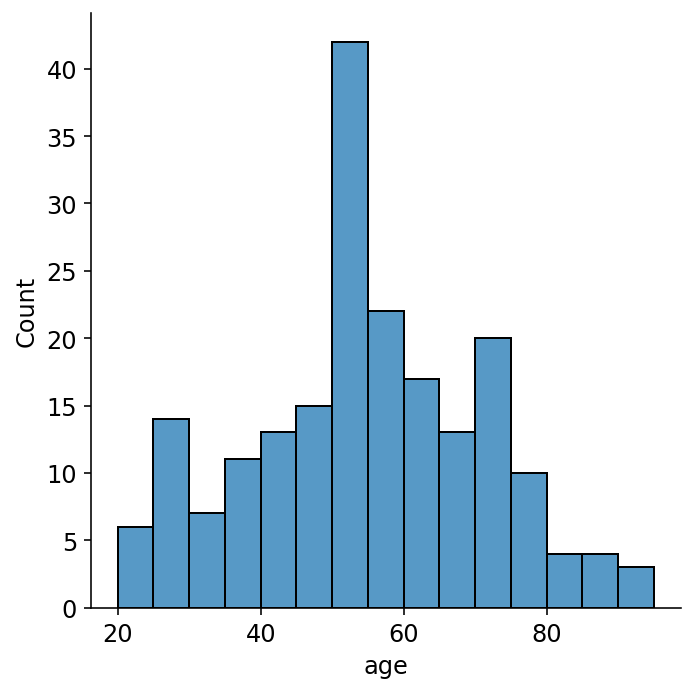

In [29]:
sns.displot(data=never_viewed_customer, x='age', bins=15)


Finally we have to accept that there are 201 customers, who are not interested to check their channels. Maybe we can say, that it makes no sense to provide any offers to them.